https://its.cern.ch/jira/browse/ATLASMINER-48

Distribution of output data access times (Accessed and never accessed)

In [53]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})

In [54]:
rse = 'WUPPERTALPROD_LOCALGROUPDISK'

In [55]:
import ssl
import urllib.request

r = urllib.request.urlopen('https://rucio-hadoop.cern.ch/datasets_per_rse?rse={0}'.format(rse), context=ssl._create_unverified_context()).read().decode('utf-8')

In [56]:
import datetime
import numpy as np

now = datetime.datetime.now()
accessed = [] 
notaccessed = []

for line in r.split('\n')[:-1]:
    l = line.split('\t')
    if l[1].startswith('user.'):
        try:
            last_access = datetime.datetime.strptime(l[6],'%Y-%m-%dT%H:%M:%S.%fZ')
        except ValueError:
            last_access = datetime.datetime.strptime(l[4],'%Y-%m-%dT%H:%M:%S.%fZ')
        created_at = datetime.datetime.strptime(l[4],'%Y-%m-%dT%H:%M:%S.%fZ')
        if ((last_access-created_at).days + (created_at - last_access).seconds/60./60./24) == 0:
            notaccessed.append((now - created_at).days + (now - created_at).seconds/60./60./24)
        elif created_at <= last_access:
            accessed.append((last_access-created_at).days + (created_at - last_access).seconds/60./60./24)

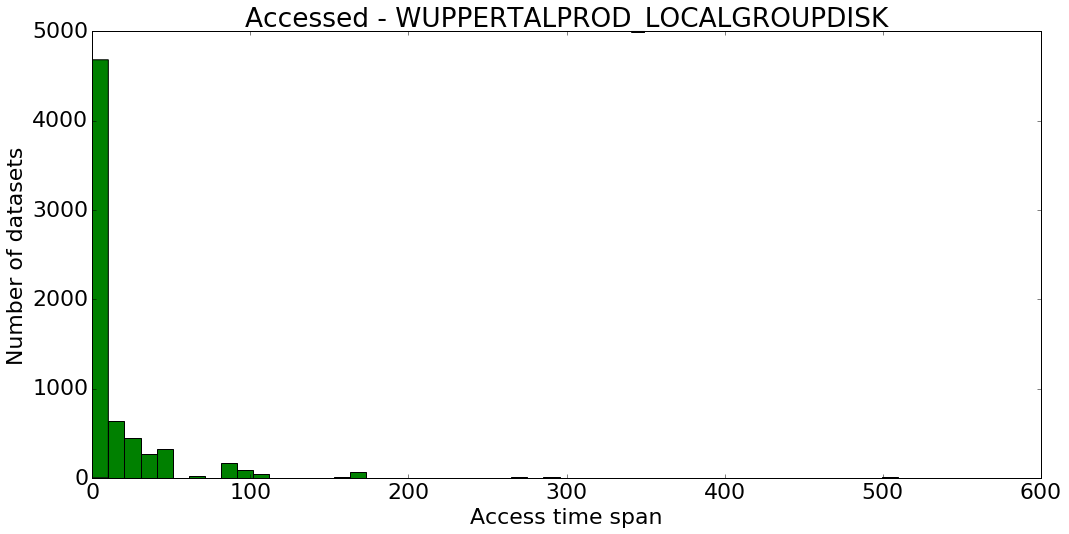

In [57]:
import matplotlib.pyplot as plt
plt.hist(accessed, 50, facecolor='green')
plt.title('Accessed - %s' % rse)
plt.xlabel('Access time span')
plt.ylabel('Number of datasets')
fig = plt.gcf()
fig.set_size_inches(17, 8)

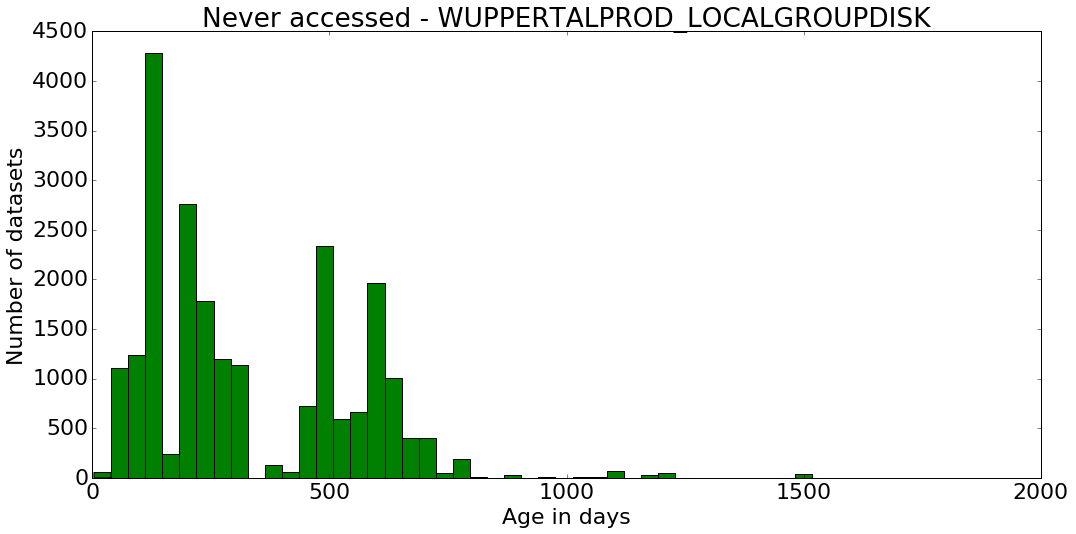

In [58]:
plt.hist(notaccessed, 50, facecolor='green')
plt.title('Never accessed - %s' % rse)
plt.xlabel('Age in days')
plt.ylabel('Number of datasets')
fig = plt.gcf()
fig.set_size_inches(17, 8)